In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data=load_breast_cancer()
data.data.shape

(569, 30)

In [15]:
data.target.shape


(569,)

In [18]:
# 直接使用交叉验证
def cross():
    rfc=RandomForestClassifier(n_estimators=100,random_state=25)
    score_pre=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    return score_pre
cross()

0.9596491228070174

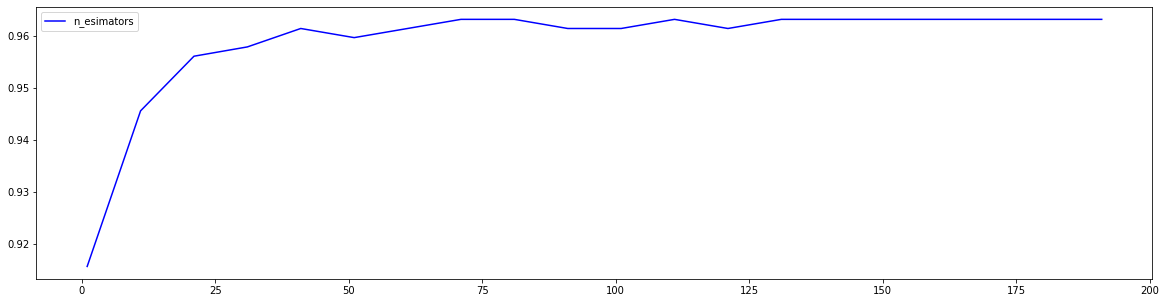

In [20]:
# 绘制n_estimators的学习曲线

superpa=[]
for i in range(0,200,10):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    rfc_s=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    superpa.append(rfc_s)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),superpa,color="blue",label="n_esimators")
plt.legend()
plt.show()

0.9613721804511279 40


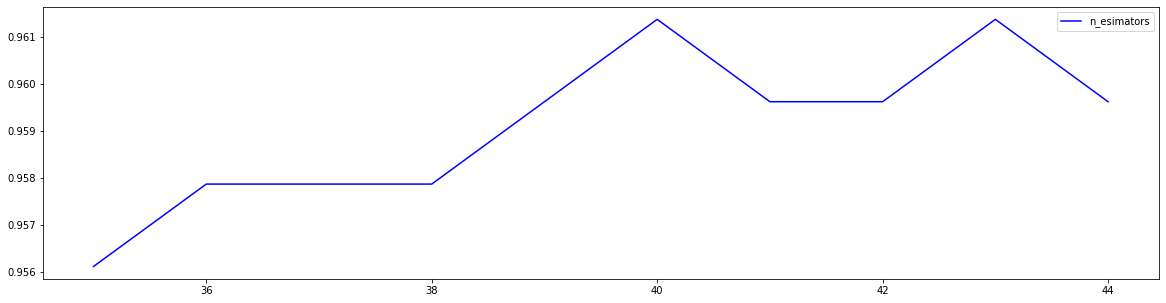

In [21]:
# 绘制n_estimators的学习曲线

superpa=[]
for i in range(35,45):
    rfc=RandomForestClassifier(n_estimators=i+1,n_jobs=-1,random_state=90)
    rfc_s=cross_val_score(rfc,data.data,data.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),([*range(35,45)][superpa.index(max(superpa))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),superpa,color="blue",label="n_esimators")
plt.legend()
plt.show()

In [22]:
# 调整max_depth

param_grid={"max_depth":np.arange(1,20,1)}

rfc=RandomForestClassifier(n_estimators=40
                           ,random_state=90
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_depth': 8}

In [23]:
GS.best_score_

0.96312656641604

In [24]:
# 调整max_features

param_grid={"max_features":np.arange(5,30,1)}
rfc=RandomForestClassifier(n_estimators=40
                           ,random_state=90
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'max_features': 6}

In [25]:
GS.best_score_

0.968421052631579

In [26]:
# 调整min_samples_leaf
param_grid={"min_samples_leaf":np.arange(1,1+10,1)}

rfc=RandomForestClassifier(n_estimators=40
                           ,random_state=90
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_leaf': 4}

In [27]:
GS.best_score_

0.9613721804511279

In [30]:
# 调整min_samples_split
param_grid={"min_samples_split":np.arange(2,2+20,1)}

rfc=RandomForestClassifier(n_estimators=40
                           ,random_state=90
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'min_samples_split': 7}

In [31]:
GS.best_score_

0.9631265664160402

In [32]:
# 调整criterion
# 调整min_samples_split
param_grid={"criterion":["gini","entropy"]}

rfc=RandomForestClassifier(n_estimators=40
                           ,random_state=90
                          )
GS=GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)
GS.best_params_

{'criterion': 'entropy'}

In [33]:
GS.best_score_

0.9649122807017543